In [5]:
import pandas as pd
import geopandas as gpd

#eez = gpd.read_file('/Users/Zack/1_sw_eez/eez_v11.shp')
#eez = eez[eez['GEONAME'] == 'French Exclusive Economic Zone']
#eez
#eez.to_file("/Users/Zack/1_sw_eez/FRA_EEZ.geojson", driver="GeoJSON")

In [6]:
#load spatial data
#eez = gpd.read_file('/Users/Zack/1_sw_eez/eez_v11.shp')

#spain
#country = gpd.read_file('/Users/Zack/1_sw_countries/countries/ESP_adm0.shp')
#eez = eez[eez['GEONAME'] == 'Spanish Exclusive Economic Zone']  
#eez_prep = gpd.read_file('/Users/Zack/1_sw_eez/eez_prep/ESP.geojson')

#france
#country = gpd.read_file('/Users/Zack/1_sw_countries/countries/FRA_adm0.shp')
#eez = eez[eez['GEONAME'] == 'French Exclusive Economic Zone']  
#eez_prep = gpd.read_file('/Users/Zack/1_sw_eez/eez_prep/FRA.geojson')

#italy
#country = gpd.read_file('/Users/Zack/1_sw_countries/countries/ITA_adm0.shp')
#eez = eez[eez['GEONAME'] == 'Italian Exclusive Economic Zone']  
#eez_prep = gpd.read_file('/Users/Zack/1_sw_eez/eez_prep/ITA.geojson')

#croatia
#country = gpd.read_file('/Users/Zack/1_sw_countries/HRV_adm0.shp')
#eez = eez[eez['GEONAME'] == 'Croatian Exclusive Economic Zone']
#eez_prep = gpd.read_file('/Users/Zack/1_sw_eez/eez_prep/HRV.geojson')

#greece
#country = gpd.read_file('/Users/Zack/0_greece/greece_adm/GRC_adm0.shp')
#eez = gpd.read_file('/Users/Zack/0_greece/EEZ/greece_EEZ.shp')
#eez_prep = gpd.read_file('/Users/Zack/0_greece/EEZ/eez_prep.shp') #created with geojson.io

#mask = gpd.read_file('/Users/Zack/0_greece/dem_eu/eu_dem_v11_mask.shp') 
#will obtain mask directly when #gdal is resolved

#eez = eez.to_crs({'init': 'epsg:2100'})
#eez_prep = eez_prep.to_crs({'init': 'epsg:2100'})
#country = country.to_crs({'init': 'epsg:2100'})

print('country:', country.crs)
print('eez:', eez.crs)
print('eez_prep:', eez_prep.crs)
#print('mask:', mask.crs)

country: {'init': 'epsg:4326'}
eez: {'init': 'epsg:4326'}
eez_prep: {'init': 'epsg:4326'}


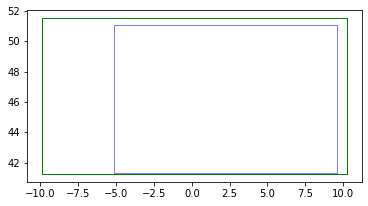

In [7]:
#create envelope

#generate envelopes
eez_e = gpd.GeoDataFrame(geometry = eez.envelope)
country_e = gpd.GeoDataFrame(geometry = country.envelope)

#combine envelopes
merge = gpd.overlay(country_e, eez_e, how = 'union')
merge['Dissolve'] = 0

#dissolve envelopes and make new envelope
envelope = merge.dissolve('Dissolve')
envelope = gpd.GeoDataFrame(geometry = envelope.envelope)
#print('envelope', envelope.crs)

#change projection
#envelope = envelope.to_crs({'init': 'epsg:4326'})
#print('envelope', envelope.crs)

#plot
#envelope = envelope.to_crs({'init': 'epsg:2100'})
ax = eez_e.plot(linewidth=.5, edgecolor = 'red', facecolor = 'none')
country_e.plot(linewidth=.5, edgecolor = 'blue', facecolor = 'none', ax=ax)
envelope.plot(linewidth=1, edgecolor = 'green', facecolor = 'none', ax=ax)

#export
envelope.to_file("/Users/Zack/1_sw_countries/envelope/FRA_envelope.shp")
envelope.to_file("/Users/Zack/1_sw_countries/envelope/FRA_envelope.geojson", driver="GeoJSON")

Wall time: 5.05 s


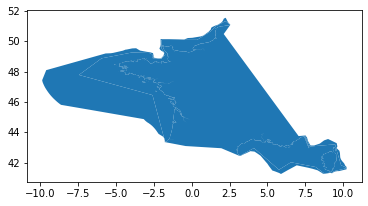

In [8]:
%%time 
merge = gpd.overlay(eez, eez_prep, how = 'union')
merge.plot()

Wall time: 16.8 s


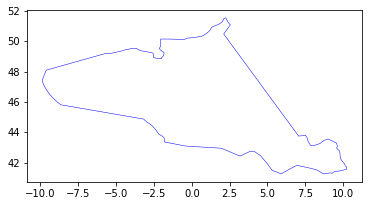

In [9]:
%%time 
#convert eez to an outline
merge = gpd.overlay(eez, eez_prep, how = 'union')
merge['Dissolve'] = 0
eez_dis = merge.dissolve('Dissolve')
eez_dis.plot(linewidth=.5, edgecolor = 'blue', facecolor = 'none')

Wall time: 48 s


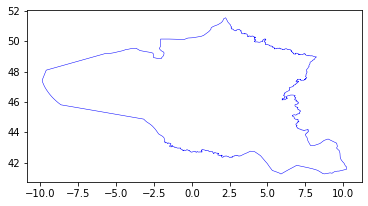

In [10]:
%%time 
#combine eez and country to create aoi
merge = gpd.overlay(eez_dis, country, how = 'union')
merge['Dissolve'] = 0
aoi = merge.dissolve('Dissolve')
aoi.plot(linewidth=.5, edgecolor = 'blue', facecolor = 'none')

In [11]:
#export aoi
aoi.to_file('/Users/Zack/1_sw_countries/aoi/FRA_aoi.shp')
#aoi.to_file('/Users/Zack/1_sw_countries/aoi/FRA_aoi.geojson', driver = "GeoJSON")

UnicodeEncodeError: 'charmap' codec can't encode character '\x80' in position 3: character maps to <undefined>

In [ ]:
%%time 
#generate 50m buffer of land mask
#mask = mask.to_crs({'init': 'epsg:2100'})
#mask_50m = mask.buffer(50)
#mask_50m = gpd.GeoDataFrame(geometry = mask_50m)
#mask_50m.plot()

In [ ]:
%%time
#generate 5km buffer of land mask
#mask_5km = mask.buffer(5000)
#mask_5km = gpd.GeoDataFrame(geometry = mask_5km)
#mask_5km.plot()

In [ ]:
%%time
#union 50m land mask to aoi to create water_50m
#mask_50m = mask_50m.to_crs({'init': 'epsg:4326'})
#aoi = mask_50m.to_crs({'init': 'epsg:4326'})

#merge = gpd.overlay(aoi, mask_50m, how = 'union')
#merge.plot(linewidth=.5, edgecolor = 'blue', facecolor = 'none')

In [ ]:
%%time
#select the water area
#gpd.GeoDataFrame(geometry = merge.loc[[0], 'geometry'])

In [ ]:
%%time
#union water 50m with 5km buffer to create search area

#select the water area between 50m and 5km

#merge2 = gpd.overlay(merge, mask_5k, how = 'union')
#merge2.plot(linewidth=.5, edgecolor = 'blue', facecolor = 'none')